In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [ ]:


# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

In [12]:
# What does our URL look like?
url = "http://books.toscrape.com/"
# Get the response
response = requests.get(url)
type(response)
# Turn it into Soup
soup = BeautifulSoup(response.text, "html.parser")
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [20]:
# Find the right tag
books_html = soup.find_all("article", class_="product_pod")
len(books_html)
type(books_html)
#books_html

bs4.element.ResultSet

## Parsing _one_ book

In [17]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [21]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [22]:
books_html[0].find("h3").find("a").attrs

{'href': 'catalogue/a-light-in-the-attic_1000/index.html',
 'title': 'A Light in the Attic'}

In [23]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [31]:
books_html[0].find("p", class_="price_color").string

'Â£51.77'

In [33]:
book_price = float(books_html[0].find("p", class_="price_color").string[2:])
book_price

51.77

In [34]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [36]:
book_stars_html.attrs

{'class': ['star-rating', 'Three']}

In [37]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [43]:
cities = [ 'paris', 'london', 'brussels' ]

if 'berlin' in cities:
    print("Berlin is available")
else:
    print("Sorry, Berlin is not available")

Sorry, Berlin is not available


In [60]:
def parse_rating(rating_classes):
    # TODO: Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    # "One" => 1
    # "Two" => 2
    # "Three" => 3
    # "Four" => 4
    # "Five" => 5
    if "One" in rating_classes:
        return 1
    if "Two" in rating_classes:
        return 2
    if "Three" in rating_classes:
        return 3
    if "Four" in rating_classes:
        return 4
    if "Five" in rating_classes:
        return 5
    else:
        return 0

In [61]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [95]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [96]:
for book in books_html:
    book_title = book.find("h3").find("a").attrs["title"]
    book_price = float(book.find("p", class_="price_color").string[2:])
    book_rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
#     print(book_title)                                                                      
    books_dict["Title"].append(book_title)
    books_dict["Price"].append(book_price)
    books_dict["Rating"].append(book_rating)
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [97]:
len(books_dict)

3

In [98]:
len(books_dict["Title"])

20

### Loading data in Pandas

In [99]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


<AxesSubplot:xlabel='Rating'>

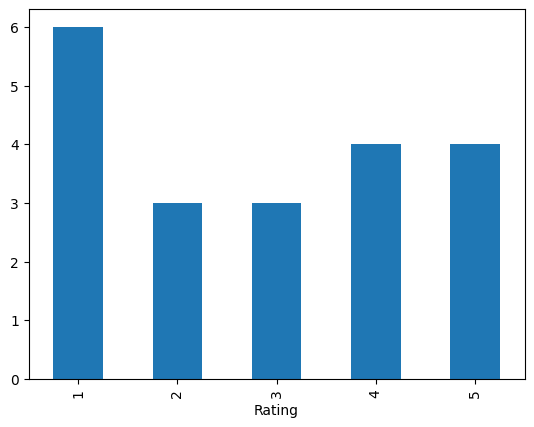

In [100]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [101]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/ccw888/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/ccw888/code/ccw888/02-Data-Toolkit/02-Data-Sourcing/data-book_scraping/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 0.54s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push origin mas

### Going through all the pages of the catalogue

In [102]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [105]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
MAX_PAGE = 50
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    for book in books_html:
        book_title = book.find("h3").find("a").attrs["title"]
        book_price = float(book.find("p", class_="price_color").string[2:])
        book_rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])                                                              
        all_books_dict["Title"].append(book_title)
        all_books_dict["Price"].append(book_price)
        all_books_dict["Rating"].append(book_rating)
all_books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Li

In [106]:
len(all_books_dict["Title"])

1000

In [107]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Our Band Could Be Your Life: Scenes from the A...,57.25,3
996,Olio,23.88,1
997,Mesaerion: The Best Science Fiction Stories 18...,37.59,1
998,Libertarianism for Beginners,51.33,2
999,It's Only the Himalayas,45.17,2


<AxesSubplot:>

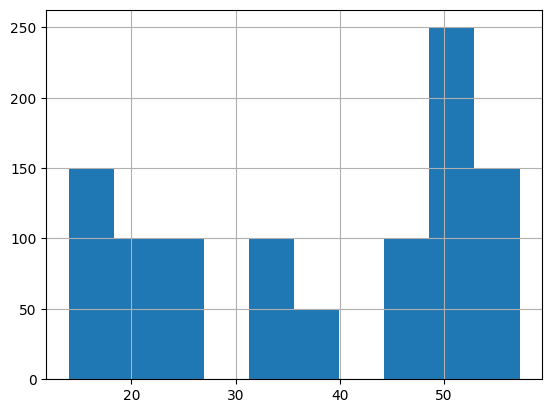

In [108]:
all_books_df["Price"].hist()

<AxesSubplot:xlabel='Rating'>

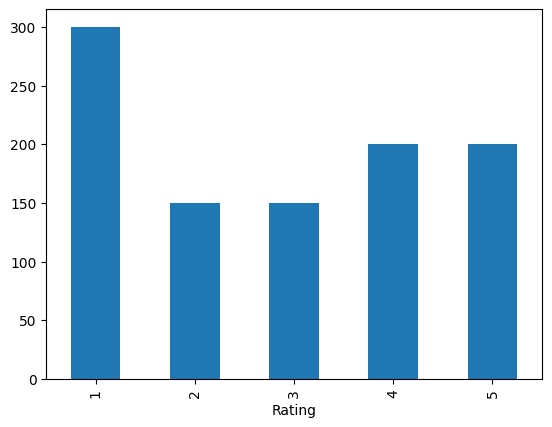

In [109]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar")

In [110]:
all_books_df.to_csv("books.csv")

In [111]:
pip install XlsxWriter


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [112]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')